# Numerical Integration Report
### M. Molter

Analytically compute the value of

$$
    I = \int^{10}_0 \sin x \, dx
$$

Then use your left-hand Riemann sum rule, the Trapezoid rule, and the Simpson 1/3 rule to compute the integral numerically using a range of step sizes $10^0 \le \Delta x \le 10^{-8}$. (It will probably be easiest if you automate this last process by using a for loop to cycle through the various values of your step size; don't forget to rest your accumulator after each integral). Make a log--log plot of the error (magnitude of the difference between the analytic and numeric answers) vs. the step size $\Delta x$. Ensure that the interval (0, 10) can be divided evenly into intervals of the step size you choose! Do the graphs look like you expect them to? How do you explain their behavior for large step sizes? For very small step sizes? How do you interpret their slopes?

### Solution

The first step, as usuall, is our library imports. `pyplot` is for plotting , and `numpy` is for heavy numerical computions.

In [9]:
import matplotlib.pyplot as plt
import numpy as np

The next step is to evaluate the integral analytically so we have an exact solution to compare to. I am lazy, so I will use `sympy` to perform the integral.

In [10]:
from sympy import Symbol, integrate, evalf

x = Symbol('x')

integrate('sin(x)', (x, 0, 10))

-cos(10) + 1

Now we can use `evalf()` again from `SymPy` to evalute:

$$
    -\cos(10) + 1
$$

to an *accuracy of 1000 decimal places...* Note the following statement performed the integral analytically, then approximates the solution function above (the way any standard calculator would) but with optional precision.

In [11]:
soln = (integrate('sin(x)', (x, 0, 10))).evalf(n=1000)
soln

1.83907152907645245225886394782406483451993016513316854683595373104879258686627076840093371276042213892745105440535024362369842337987957751969618636138599016240576199182006400100966550965469041048284459666898038675471697117101052082692130732418341256707226561830110093135614920902814223325290814789712587963413460106057971478089694004611010062472713254226184457645941699348240630160881295937942411144487065174920325563908722786226629612794379903690296309360795607690800397808797415590663548594419852031416780668949357770288291775344425650596082934764251329019913813509049563121022478118041495631256288332476620922975539839308063031577328935537093055391765335651799854660440466883013271333812896247101549973768218486762213539696873304526428068510558403137719371936964109771247274178226100613494406257294850409185056950474392585588788166987519302579455148883465234452641905669644274150314134154694974402828333012312609306255483102257802318305372484440842433727428709461544770334634386054182600039260025

Now we can start fleshing out a `integrate` function of our own. A lot of the code for "right-hand", "trapezoid", and "Simpson's" gets repeated, so I will stuff this all in one function with a `method=` argument.

In [12]:
import sys

def integrate(func, start, stop, step, method='trap'):
    ''' Return the numerical integration of func from start to stop. 
    
        Performs:
        
                      I = int^a_b func(x) dx
    
        Args:
            
            func (function):    function
            start (float):      a bound
            stop (float):       b bound
            step (float):       dx
            
            method (string): 
            
                'right':        right-hand Riemann sum
                'left':         left-hand Riemann sum
                'trap':         trapezoidal sum
                'simp':         Simpson's 1/3 rule
                
        Returns:
        
            float:              I.
    '''
    
    assert (stop > start), "Stop must be larger than start."
    assert method in ['left', 'right', 'trap', 'simp']

    if method == 'left':
        x = np.arange(start, stop, step)
        return (func(x) * step).sum()
        
    elif method == 'right':
        x = np.arange(start + step, stop + step, step)
        return (func(x) * step).sum()
    
    elif method == 'trap':
        x = np.arange(start, stop + step, step)
        y = func(x)
        
        return (step * (0.5 * (y[:-1] + y[1:]))).sum()
        
    elif method == 'simp':
        x = np.arange(start, stop + step, step)
        y = func(x)
        
        y_left  = y[:-1]
        y_right = y[1:]
        
        x_mid = 0.5 * (x[:-1] + x[1:])
        y_mid = func(x_mid)
        
        return (y_left + 4.0 * y_mid + y_right).sum() * (step / 6.0)

Now let's test out all three versions to make sure things are working as we'd expect.

In [5]:
func = lambda x: np.sin(x)

%timeit print(integrate(func, start=0, stop=10, step=10e-8, method='left'))
%timeit print(integrate(func, start=0, stop=10, step=10e-8, method='right'))
%timeit print(integrate(func, start=0, stop=10, step=10e-8, method='trap'))
%timeit print(integrate(func, start=0, stop=10, step=10e-8, method='simp'))

1.8390715562775095
1.8390715562775095
1.8390715562775095
1.8390715562775095
1 loop, best of 3: 2.79 s per loop
1.8390715018753934
1.8390715018753934
1.8390715018753934
1.8390715018753934
1 loop, best of 3: 2.9 s per loop
1.8390715290764523
1.8390715290764523
1.8390715290764523
1.8390715290764523
1 loop, best of 3: 3.4 s per loop
1.8390715290764494
1.8390715290764494
1.8390715290764494
1.8390715290764494
1 loop, best of 3: 5.95 s per loop


Now we need a relative error function.

In [13]:
def relative_error(numerical, exact):
    ''' Return relative error given numerical and exact solutions. '''
    
    return abs(numerical - exact) * 100 / exact

Now let's create our plots.

(10, 1e-07)

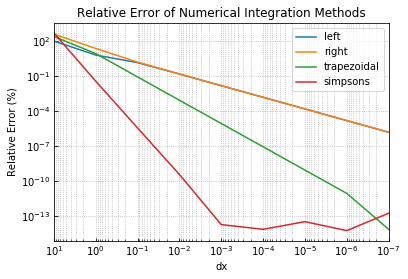

In [7]:
func = lambda x: np.sin(x)

dx = np.logspace(start=1, stop=-7, num=9)
plt.loglog(dx, [relative_error(integrate(func, 0, 10, i, method='left'),  soln) for i in dx], label='left')
plt.loglog(dx, [relative_error(integrate(func, 0, 10, i, method='right'), soln) for i in dx], label='right')
plt.loglog(dx, [relative_error(integrate(func, 0, 10, i, method='trap'),  soln) for i in dx], label='trapezoidal')
plt.loglog(dx, [relative_error(integrate(func, 0, 10, i, method='simp'),  soln) for i in dx], label='simpsons')
    
plt.title('Relative Error of Numerical Integration Methods')    
plt.xlabel('dx')
plt.ylabel('Relative Error (%)')
plt.legend()

plt.grid(linestyle=':', which='both') 
plt.tick_params(which='both', direction='in')
plt.xlim([10, 10e-8])    

The first thing I notice is that the `left` and `right` integration methods are produced essentially the same performance. Further, for the same number of function executions, `trapezoidal` produces far more precice results. The `simpsons` version is even better--even though it has *double* the executions its timestep would suggest. It still more than makes up for this extra step with a faster converging error.

The next major feature is that the error for Simpson's decrease to about $10^{-12}$ %, and then starts increasing again. I suspect this is the point where **roundoff** error dominates, and that the other methods would face a similar issue onces they reach similarly accurate results.